In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [74]:
df=pd.read_csv('../data/Weather_vs_Pixel_Area.csv')
df=df.drop('Unnamed: 0',1)

In [75]:
df.head()

,BME280_Humidity,BME280_Pressure,BME280_Temp,DS18B20_Temp,Date,Intensity,Spinach_Area,Potato_Area
0,54.00,898.84,30.25,23.62,2019-10-26 13:11:25,2011.0,126,890
1,54.04,898.64,30.02,23.62,2019-10-26 13:26:32,1797.0,398,1413
2,53.66,898.40,29.86,23.19,2019-10-26 13:41:39,1694.0,244,962
3,53.50,898.20,29.96,23.25,2019-10-26 13:56:47,1614.0,1159,2538
4,53.42,898.04,29.93,22.81,2019-10-26 14:11:54,1512.0,324,2880


In [76]:
def avearge(l,y,x):
    sum=0.0;
    for i in range(x,y+1):
        sum=sum+l[i]
    return (sum/(y-x+1))

In [77]:
def Normalize(x):
    return ((x-np.min(x))/(max(x)-min(x)))

In [78]:
h=np.array(df.BME280_Humidity)
p=np.array(df.BME280_Pressure)
t=np.array(df.BME280_Temp)
inten=np.array(df.Intensity)
sa=np.array(df.Spinach_Area)
pa=np.array(df.Potato_Area)
data=pd.DataFrame()

j=200
j2=int((j/2) + 1) 
for i in range(j,len(h)):
    dic={}
    dic['BME280_Humidity']=avearge(h,i-j2,i-j)
    dic['BME280_Pressure']=avearge(p,i-j2,i-j)
    dic['BME280_Temp']=avearge(t,i-j2,i-j)
    dic['Intensity']=avearge(inten,i-j2,i-j)
    dic['Spinach_Area']=sa[i]
    dic['Potato_Area']=pa[i]
    data=data.append(dic,ignore_index=True)
data=data.apply(Normalize)
# data.to_csv('Weather_vs_Pixel_Area_10days.csv')
data.corr()

,BME280_Humidity,BME280_Pressure,BME280_Temp,Intensity,Potato_Area,Spinach_Area
BME280_Humidity,1.000000,0.952427,0.336412,0.580179,-0.453484,-0.451344
BME280_Pressure,0.952427,1.000000,0.545547,0.740000,-0.343564,-0.329640
BME280_Temp,0.336412,0.545547,1.000000,0.940901,0.018321,0.069976
Intensity,0.580179,0.740000,0.940901,1.000000,-0.153238,-0.076754
Potato_Area,-0.453484,-0.343564,0.018321,-0.153238,1.000000,0.895510
Spinach_Area,-0.451344,-0.329640,0.069976,-0.076754,0.895510,1.000000


In [79]:
x=data[['BME280_Humidity','BME280_Pressure','BME280_Temp','Intensity']]
y=data['Spinach_Area']

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.6,random_state=100)

In [81]:
x_train_sm=x_train
y_train_sm=y_train
x_train_sm=sm.add_constant(x_train_sm)
lm_1=sm.OLS(y_train_sm,x_train_sm).fit()

In [82]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:           Spinach_Area   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     1.562
Date:                Fri, 03 Jul 2020   Prob (F-statistic):              0.215
Time:                        20:02:12   Log-Likelihood:                -4.4409
No. Observations:                  30   AIC:                             18.88
Df Residuals:                      25   BIC:                             25.89
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.7505      0.227     

In [83]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [84]:
vif_cal(input_data=data, dependent_col="Spinach_Area")

,Var,Vif
3,Intensity,94.83
2,BME280_Temp,68.60
1,BME280_Pressure,24.38
0,BME280_Humidity,20.69
4,Potato_Area,2.21


In [85]:
x_train_sm=x_train_sm.drop('Intensity',1)

In [86]:
lm_2 = sm.OLS(y_train_sm,x_train_sm).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:           Spinach_Area   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     2.165
Date:                Fri, 03 Jul 2020   Prob (F-statistic):              0.116
Time:                        20:02:18   Log-Likelihood:                -4.4412
No. Observations:                  30   AIC:                             16.88
Df Residuals:                      26   BIC:                             22.49
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.7514      0.219     

In [87]:
vif_cal(input_data=data.drop(["Intensity"], axis=1), dependent_col="Spinach_Area")

,Var,Vif
1,BME280_Pressure,22.83
0,BME280_Humidity,19.50
2,BME280_Temp,4.80
3,Potato_Area,1.94


In [88]:
x_train_sm=x_train_sm.drop('BME280_Pressure',1)

In [89]:
lm_3 = sm.OLS(y_train_sm,x_train_sm).fit()

In [90]:
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:           Spinach_Area   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     3.226
Date:                Fri, 03 Jul 2020   Prob (F-statistic):             0.0554
Time:                        20:02:31   Log-Likelihood:                -4.5729
No. Observations:                  30   AIC:                             15.15
Df Residuals:                      27   BIC:                             19.35
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.6640      0.120     

In [91]:
vif_cal(input_data=data.drop(["BME280_Pressure","Intensity"], axis=1), dependent_col="Spinach_Area")

,Var,Vif
1,BME280_Temp,3.83
0,BME280_Humidity,2.89
2,Potato_Area,1.64


In [92]:
x_train_sm=x_train_sm.drop('BME280_Temp',1)

In [93]:
lm_4 = sm.OLS(y_train_sm,x_train_sm).fit()

In [94]:
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:           Spinach_Area   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     6.649
Date:                Fri, 03 Jul 2020   Prob (F-statistic):             0.0155
Time:                        20:07:29   Log-Likelihood:                -4.5908
No. Observations:                  30   AIC:                             13.18
Df Residuals:                      28   BIC:                             15.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.6770      0.094     

In [95]:
x_test=x_test.drop(["BME280_Pressure","BME280_Temp","Intensity"],1)
x_test_sm = sm.add_constant(x_test)
x_test_sm.head()

,const,BME280_Humidity
6,1.0,0.707857
36,1.0,0.271017
37,1.0,0.295665
28,1.0,0.168684
43,1.0,0.403169


In [96]:
y_pred=lm_4.predict(x_test_sm)

In [97]:
c=[i for i in range(1,len(y_pred)+1)]

Text(0, 0.5, 'Potato Area')

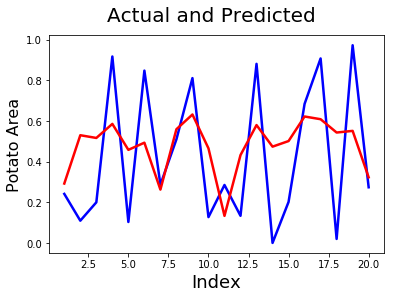

In [98]:
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Potato Area', fontsize=16)

Text(0, 0.5, 'ytest-ypred')

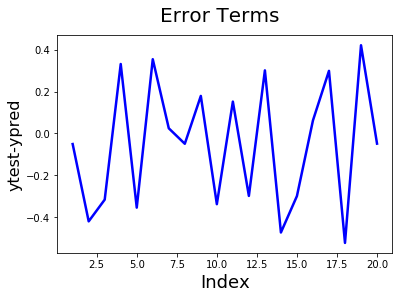

In [99]:
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16) 

In [100]:
mse=mean_squared_error(y_test,y_pred)
mse

0.09267213452726664

In [101]:
r2s=r2_score(y_test,y_pred)
r2s

0.19432641358801106